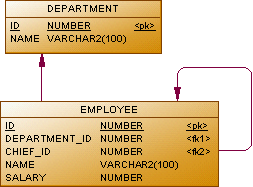

**1. Вывести список сотрудников, получающих заработную плату большую чем у непосредственного руководителя**

select a.*  
from   employee a, employee b  
where  b.id = a.chief_id  
and    a.salary > b.salary  

**2. Вывести список сотрудников, получающих максимальную заработную плату в своем отделе**

select a.*  
from   employee a  
where  a.salary = ( select max(salary) from employee b  
                    where  b.department_id = a.department_id )  

**3. Вывести список ID отделов, количество сотрудников в которых не превышает 3 человек**

select department_id  
from   employee  
group  by department_id  
having count(*) <= 3  

**4. Вывести список сотрудников, не имеющих назначенного руководителя, работающего в том-же отделе**

select a.*  
from   employee a  
left   join employee b on (b.id = a.chief_id and b.department_id = a.department_id)  
where  b.id is null  

**5. Найти список ID отделов с максимальной суммарной зарплатой сотрудников**

with sum_salary as  
  ( select department_id, sum(salary) salary  
    from   employee  
    group  by department_id )  
select department_id  
from   sum_salary a         
where  a.salary = ( select max(salary) from sum_salary )   

**6. Составить SQL-запрос, вычисляющий произведение вещественных значений, содержащихся в некотором столбце таблицы**

select  
  exp(sum(ln(decode(sign(salary),0,1,-1,-salary,salary))))  
 *decode(mod(sum(decode(sign(salary),-1,1,0)),2),1,-1,1)  
 *sign(min(abs(salary)))  
from employee  